In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data
df = pd.read_csv("../../STB.csv")
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df.head()

,Price
0,13400.0
1,13350.0
2,13600.0
3,13600.0
4,14550.0


In [3]:
# Split the data into training, testing sets by 9:1
length = len(df)
train_size = int(0.9 * length)
test_size =length - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
#3. Set up training process 
from pmdarima.arima import auto_arima 
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20523.931, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20525.158, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20525.083, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20522.541, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20526.496, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.547 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 4.make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [6]:
# 5.Caculate some metrics
# calculate the RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# calculate the MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# calculate the MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 2384.861980632562
Testing MAPE: 6.04437331002807
Testing MAE: 1862.6666666666667


In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[27950. 27950. 27950. 27950. 27950. 27950. 27950. 27950. 27950. 27950.
 27950. 27950. 27950. 27950. 27950. 27950. 27950. 27950. 27950. 27950.
 27950. 27950. 27950. 27950. 27950. 27950. 27950. 27950. 27950. 27950.]


In [8]:
y_next_30_days

array([27950., 27950., 27950., 27950., 27950., 27950., 27950., 27950.,
       27950., 27950., 27950., 27950., 27950., 27950., 27950., 27950.,
       27950., 27950., 27950., 27950., 27950., 27950., 27950., 27950.,
       27950., 27950., 27950., 27950., 27950., 27950.])

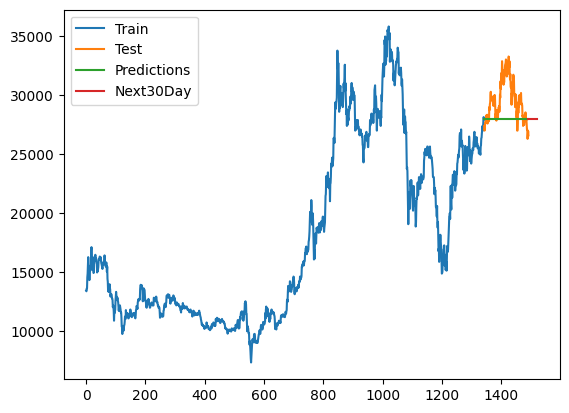

In [9]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()